<a href="https://www.kaggle.com/code/dtthomas/seattle-crisis-data-set-dashboard?scriptVersionId=233736399" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Current Seattle Crisis Dashboard

<center><img src="https://ghost.septillionai.com/seattle.jpg" width="500" height="300" /></center>

In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly

import plotly.express as px
import plotly.graph_objects as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)    #THIS LINE IS MOST IMPORTANT AS THIS WILL DISPLAY PLOT ON 
#NOTEBOOK WHILE KERNEL IS RUNNING


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


import os


# Any results you write to the current directory are saved as output.

In [79]:
url = '/kaggle/input/seattle-crisis-dataset/Crisis_Data.csv'
data = pd.read_csv(url)
print('Dimensions: ', data.shape)
print('Unique IDs: ', data['Template ID'].nunique())
print('Data from ', min(data['Reported Date']), ' to ', max(data['Reported Date']))
data.head()

Dimensions:  (99558, 25)
Unique IDs:  97788
Data from  01/01/2016  to  12/31/2024


,Template ID,Reported Date,Reported Time,Occurred Date / Time,Call Type,Initial Call Type,Final Call Type,Disposition,Use of Force Indicator,Subject Veteran Indicator,...,Officer Race,Officer Year of Birth,Officer Years of Experience,CIT Certified Indicator,Officer Bureau Desc,Officer Precinct Desc,Officer Squad Desc,Precinct,Sector,Beat
0,43946,05/15/2015,22:14:00.0000000,05/15/2015 06:47:32 PM,911,SUICIDE - CRITICAL,CRISIS COMPLAINT - GENERAL,Emergent Detention / ITA,N,N,...,White,1968,29,N,OPERATIONS BUREAU,NORTH PCT,NORTH PCT 2ND W - BOY (JOHN) - PLATOON 1,North,LINCOLN,L2
1,43832,05/16/2015,13:24:00.0000000,05/16/2015 10:14:07 AM,911,DISTURBANCE,DISTURBANCE - OTHER,Resources Declined,N,N,...,White,1977,2,N,OPERATIONS BUREAU,EAST PCT,EAST PCT 1ST W - E/G RELIEF (CHARLIE),East,CHARLIE,C3
2,48363,05/30/2015,16:14:00.0000000,05/30/2015 02:51:41 PM,911,DISTURBANCE - DV CRITICAL,DISTURBANCE - OTHER,Resources Declined,N,N,...,White,1961,38,N,OPERATIONS BUREAU,SOUTHWEST PCT,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,SouthWest,FRANK,F1
3,45259,05/21/2015,07:44:00.0000000,05/21/2015 03:00:25 AM,911,DISTURBANCE,DISTURBANCE - OTHER,Subject Arrested,Y,N,...,Asian,1984,6,N,OPERATIONS BUREAU,NORTH PCT,NORTH PCT 1ST W - B/N RELIEF (JOHN),North,NORA,N1
4,57618,06/23/2015,14:15:00.0000000,06/23/2015 11:22:20 AM,911,DISTURBANCE - DV CRITICAL,"DV - ARGUMENTS, DISTURBANCE (NO ARREST)",No Action Possible / Necessary,N,N,...,Native Hawaiian or Other Pacific Islander,1982,2,N,OPERATIONS BUREAU,SOUTHWEST PCT,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,SouthWest,FRANK,F1


In [80]:
print('Data is current as of ', max(data['Reported Date']))

Data is current as of  12/31/2024


In [81]:
data.loc[data.Beat == "L2","Lon"] = -122.320
data.loc[data.Beat == "M1","Lon"] = -122.310
data.loc[data.Beat == "K3","Lon"] = -122.323
data.loc[data.Beat == "K2","Lon"] = -122.327
data.loc[data.Beat == "K1","Lon"] = -122.327
data.loc[data.Beat == "M2","Lon"] = -122.329
data.loc[data.Beat == "M3","Lon"] = -122.329
data.loc[data.Beat == "L1","Lon"] = -122.314
data.loc[data.Beat == "L3","Lon"] = -122.299
data.loc[data.Beat == "N2","Lon"] = -122.327
data.loc[data.Beat == "N3","Lon"] = -122.327
data.loc[data.Beat == "N1","Lon"] = -122.364
data.loc[data.Beat == "J1","Lon"] = -122.386
data.loc[data.Beat == "J2","Lon"] = -122.380
data.loc[data.Beat == "J3","Lon"] = -122.337
data.loc[data.Beat == "B3","Lon"] = -122.334
data.loc[data.Beat == "B2","Lon"] = -122.354
data.loc[data.Beat == "B1","Lon"] = -122.391
data.loc[data.Beat == "U1","Lon"] = -122.316
data.loc[data.Beat == "U2","Lon"] = -122.308
data.loc[data.Beat == "U3","Lon"] = -122.291
data.loc[data.Beat == "W1","Lon"] = -122.377
data.loc[data.Beat == "W2","Lon"] = -122.385
data.loc[data.Beat == "W3","Lon"] = -122.381
data.loc[data.Beat == "F1","Lon"] = -122.361
data.loc[data.Beat == "F2","Lon"] = -122.361
data.loc[data.Beat == "F3","Lon"] = -122.337
data.loc[data.Beat == "O1","Lon"] = -122.336
data.loc[data.Beat == "O2","Lon"] = -122.334
data.loc[data.Beat == "O3","Lon"] = -122.320
data.loc[data.Beat == "S1","Lon"] = -122.296
data.loc[data.Beat == "S2","Lon"] = -122.288
data.loc[data.Beat == "S3","Lon"] = -122.268
data.loc[data.Beat == "R1","Lon"] = -122.304
data.loc[data.Beat == "R2","Lon"] = -122.306
data.loc[data.Beat == "R3","Lon"] = -122.289
data.loc[data.Beat == "C1","Lon"] = -122.213
data.loc[data.Beat == "C2","Lon"] = -122.305
data.loc[data.Beat == "C3","Lon"] = -122.291
data.loc[data.Beat == "E1","Lon"] = -122.317
data.loc[data.Beat == "E2","Lon"] = -122.313
data.loc[data.Beat == "E3","Lon"] = -122.316
data.loc[data.Beat == "G1","Lon"] = -122.313
data.loc[data.Beat == "G2","Lon"] = -122.297
data.loc[data.Beat == "G3","Lon"] = -122.298
data.loc[data.Beat == "Q1","Lon"] = -122.407
data.loc[data.Beat == "Q2","Lon"] = -122.365
data.loc[data.Beat == "Q3","Lon"] = -122.364
data.loc[data.Beat == "D1","Lon"] = -122.364
data.loc[data.Beat == "D2","Lon"] = -122.355
data.loc[data.Beat == "D3","Lon"] = -122.343

In [82]:
data.loc[data.Beat == "L2","Lat"] = 47.695
data.loc[data.Beat == "M1","Lat"] = 47.600
data.loc[data.Beat == "K3","Lat"] = 47.598
data.loc[data.Beat == "K2","Lat"] = 47.586
data.loc[data.Beat == "K1","Lat"] = 47.603
data.loc[data.Beat == "M2","Lat"] = 47.611
data.loc[data.Beat == "M3","Lat"] = 47.610
data.loc[data.Beat == "L1","Lat"] = 47.722
data.loc[data.Beat == "L3","Lat"] = 47.713
data.loc[data.Beat == "N2","Lat"] = 47.719
data.loc[data.Beat == "N3","Lat"] = 47.705
data.loc[data.Beat == "N1","Lat"] = 47.714
data.loc[data.Beat == "J1","Lat"] = 47.693
data.loc[data.Beat == "J2","Lat"] = 47.682
data.loc[data.Beat == "J3","Lat"] = 47.679
data.loc[data.Beat == "B3","Lat"] = 47.661
data.loc[data.Beat == "B2","Lat"] = 47.662
data.loc[data.Beat == "B1","Lat"] = 47.668
data.loc[data.Beat == "U1","Lat"] = 47.695
data.loc[data.Beat == "U2","Lat"] = 47.657
data.loc[data.Beat == "U3","Lat"] = 47.671
data.loc[data.Beat == "W1","Lat"] = 47.574
data.loc[data.Beat == "W2","Lat"] = 47.559
data.loc[data.Beat == "W3","Lat"] = 47.517
data.loc[data.Beat == "F1","Lat"] = 47.541
data.loc[data.Beat == "F2","Lat"] = 47.528
data.loc[data.Beat == "F3","Lat"] = 47.527
data.loc[data.Beat == "O1","Lat"] = 47.582
data.loc[data.Beat == "O2","Lat"] = 47.559
data.loc[data.Beat == "O3","Lat"] = 47.542
data.loc[data.Beat == "S1","Lat"] = 47.539
data.loc[data.Beat == "S2","Lat"] = 47.538
data.loc[data.Beat == "S3","Lat"] = 47.517
data.loc[data.Beat == "R1","Lat"] = 47.566
data.loc[data.Beat == "R2","Lat"] = 47.565
data.loc[data.Beat == "R3","Lat"] = 47.552
data.loc[data.Beat == "C1","Lat"] = 47.622
data.loc[data.Beat == "C2","Lat"] = 47.630
data.loc[data.Beat == "C3","Lat"] = 47.621
data.loc[data.Beat == "E1","Lat"] = 47.620
data.loc[data.Beat == "E2","Lat"] = 47.613
data.loc[data.Beat == "E3","Lat"] = 47.610
data.loc[data.Beat == "G1","Lat"] = 47.606
data.loc[data.Beat == "G2","Lat"] = 47.604
data.loc[data.Beat == "G3","Lat"] = 47.593
data.loc[data.Beat == "Q1","Lat"] = 47.650
data.loc[data.Beat == "Q2","Lat"] = 47.639
data.loc[data.Beat == "Q3","Lat"] = 47.623
data.loc[data.Beat == "D1","Lat"] = 47.617
data.loc[data.Beat == "D2","Lat"] = 47.618
data.loc[data.Beat == "D3","Lat"] = 47.621

In [83]:
df_date = data.tail(100)

In [84]:
df = pd.read_csv("../input/seattle-crisis-dataset/Crisis_Data.csv", parse_dates=['Reported Date', 'Occurred Date / Time'])
df.head(30)

,Template ID,Reported Date,Reported Time,Occurred Date / Time,Call Type,Initial Call Type,Final Call Type,Disposition,Use of Force Indicator,Subject Veteran Indicator,...,Officer Race,Officer Year of Birth,Officer Years of Experience,CIT Certified Indicator,Officer Bureau Desc,Officer Precinct Desc,Officer Squad Desc,Precinct,Sector,Beat
0,43946,2015-05-15,22:14:00.0000000,2015-05-15 18:47:32,911,SUICIDE - CRITICAL,CRISIS COMPLAINT - GENERAL,Emergent Detention / ITA,N,N,...,White,1968,29,N,OPERATIONS BUREAU,NORTH PCT,NORTH PCT 2ND W - BOY (JOHN) - PLATOON 1,North,LINCOLN,L2
1,43832,2015-05-16,13:24:00.0000000,2015-05-16 10:14:07,911,DISTURBANCE,DISTURBANCE - OTHER,Resources Declined,N,N,...,White,1977,2,N,OPERATIONS BUREAU,EAST PCT,EAST PCT 1ST W - E/G RELIEF (CHARLIE),East,CHARLIE,C3
2,48363,2015-05-30,16:14:00.0000000,2015-05-30 14:51:41,911,DISTURBANCE - DV CRITICAL,DISTURBANCE - OTHER,Resources Declined,N,N,...,White,1961,38,N,OPERATIONS BUREAU,SOUTHWEST PCT,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,SouthWest,FRANK,F1
3,45259,2015-05-21,07:44:00.0000000,2015-05-21 03:00:25,911,DISTURBANCE,DISTURBANCE - OTHER,Subject Arrested,Y,N,...,Asian,1984,6,N,OPERATIONS BUREAU,NORTH PCT,NORTH PCT 1ST W - B/N RELIEF (JOHN),North,NORA,N1
4,57618,2015-06-23,14:15:00.0000000,2015-06-23 11:22:20,911,DISTURBANCE - DV CRITICAL,"DV - ARGUMENTS, DISTURBANCE (NO ARREST)",No Action Possible / Necessary,N,N,...,Native Hawaiian or Other Pacific Islander,1982,2,N,OPERATIONS BUREAU,SOUTHWEST PCT,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,SouthWest,FRANK,F1
5,57800,2015-06-26,11:21:00.0000000,2015-06-26 10:00:11,"TELEPHONE OTHER, NOT 911",UNKNOWN - ANI/ALI - LANDLINE (INCLUDES OPEN LINE),CRISIS COMPLAINT - GENERAL,Subject Arrested,N,N,...,Declined to Answer,1967,26,N,OPERATIONS BUREAU,EAST PCT,EAST PCT 1ST W - EDWARD (CHARLIE) - PLATOON 2,East,CHARLIE,C2
6,58914,2015-06-30,18:27:00.0000000,2015-06-30 16:03:20,911,SFD - ASSIST ON CRITICAL FIRE OR MEDIC RESPONSE,CRISIS COMPLAINT - PICK-UP OR TRANSPORT,DMHP Referral,N,N,...,White,1960,25,N,OPERATIONS BUREAU,WEST PCT,WEST PCT 2ND W - MARY - PLATOON 1,West,QUEEN,Q3
7,61049,2015-07-07,01:42:00.0000000,1900-01-01 00:00:00,-,-,-,Resources Declined,N,N,...,Two or More Races,1985,1,N,NaN,NaN,NaN,-,-,-
8,61501,2015-07-09,10:27:00.0000000,2015-07-09 09:32:55,911,PERSON IN BEHAVIORAL/EMOTIONAL CRISIS,CRISIS COMPLAINT - GENERAL,Emergent Detention / ITA,N,N,...,White,1977,14,N,OPERATIONS BUREAU,EAST PCT,EAST PCT 1ST W - E/G RELIEF (CHARLIE),East,EDWARD,E3
9,62099,2015-07-11,16:42:00.0000000,2015-07-11 15:10:17,ONVIEW,PERSON IN BEHAVIORAL/EMOTIONAL CRISIS,CRISIS COMPLAINT - GENERAL,Voluntary Committal,N,N,...,White,1954,18,N,OPERATIONS BUREAU,NORTH PCT,NORTH PCT 2ND W - UNION - PLATOON 1,North,NORA,N3


In [85]:
# how big is the dataset?
print("Num rows: {0}".format(df.shape[0]))
# what range of dates do we have?
print("Min date: {0} | Max date: {1}".format(df['Reported Date'].min(), df['Reported Date'].max()))

Num rows: 99558
Min date: 2015-05-15 00:00:00 | Max date: 2025-04-12 00:00:00


In [86]:
# clean up bogus dates
df = df[df['Reported Date'].dt.year > 2000].copy()
print("Min date: {0} | Max date: {1}".format(df['Reported Date'].min(), df['Reported Date'].max()))

Min date: 2015-05-15 00:00:00 | Max date: 2025-04-12 00:00:00


In [87]:
dfg = df[['Reported Date','Template ID']].groupby('Reported Date').count()
dfg.rename({'Template ID':'Incidents'},axis=1,inplace=True)

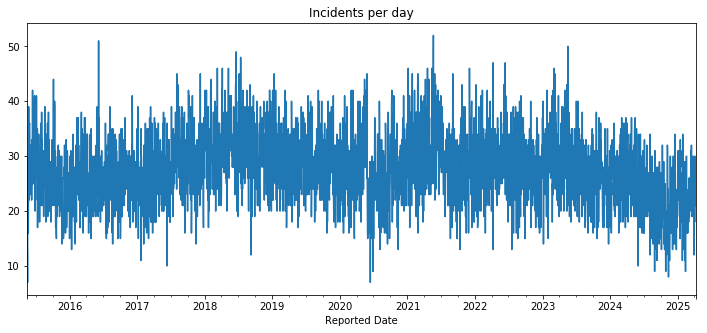

In [88]:
dfg.plot.line(
    figsize=(12,5), 
    colormap='tab20',
    title="Incidents per day",
    legend=False
)

In [89]:
datadf = [go.Scatter(x=dfg.index.tolist(), y=dfg['Incidents'])]

# specify the layout of our figure
layout = dict(title = "Number of Incidents Per Day",
              xaxis= dict(title= 'Date',ticklen= 5,zeroline= False))

# create and show our figure
fig = dict(data = datadf, layout = layout)
iplot(fig)

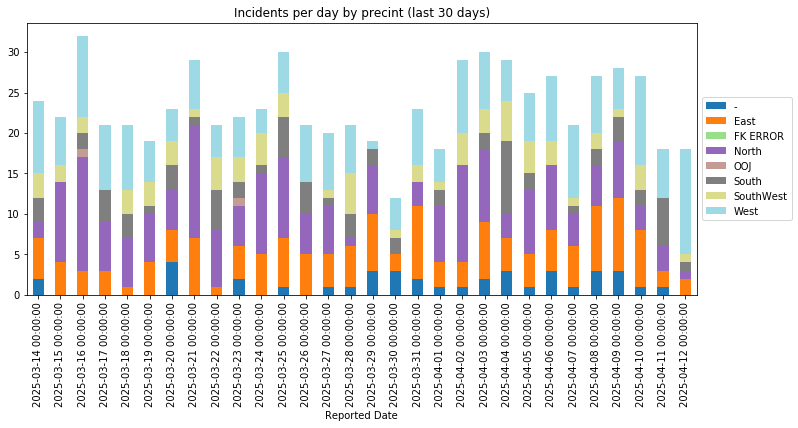

In [90]:
dfp_precinct = pd.pivot_table(
    data=df[['Reported Date', 'Precinct']],
    index='Reported Date',
    columns=['Precinct'],
    aggfunc=len,
)
dfp_precinct.iloc[-30::,:].plot.bar(
    stacked=True, 
    figsize=(12,5), 
    colormap='tab20',
    title="Incidents per day by precint (last 30 days)"
).legend(loc='center left', bbox_to_anchor=(1, 0.5))

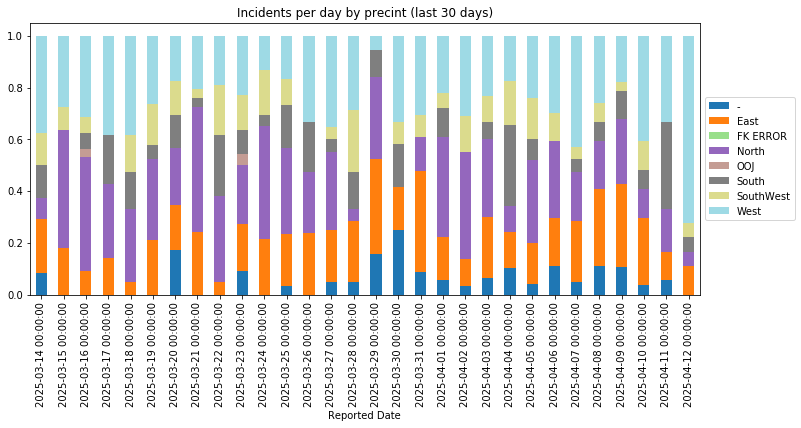

In [91]:
dfp_precinct.iloc[-30::,:].div(dfp_precinct.iloc[-30::,:].sum(axis=1), axis=0).plot.bar(
    stacked=True, 
    figsize=(12,5), 
    colormap='tab20',
    title="Incidents per day by precint (last 30 days)"
).legend(loc='center left', bbox_to_anchor=(1, 0.5))

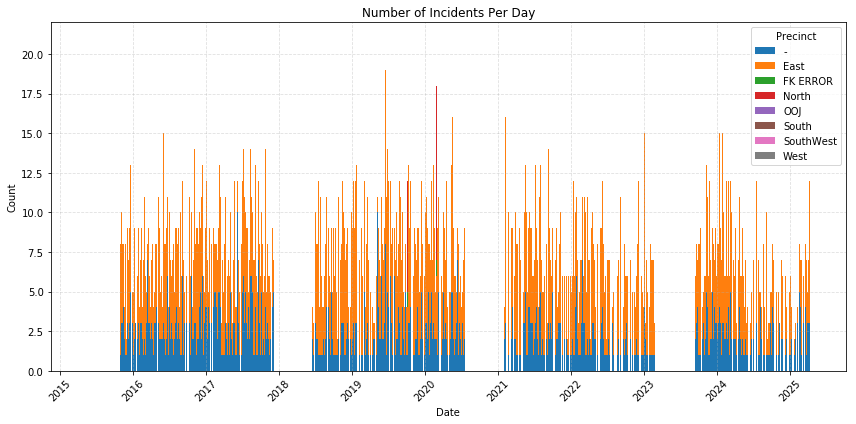

In [92]:
# Example: assuming dfp_precinct is indexed by date
# Ensure the index is datetime
dfp_precinct.index = pd.to_datetime(dfp_precinct.index)

# Plot setup
fig, ax = plt.subplots(figsize=(12, 6))

# Stacked bar plot
bottom = None
for col in dfp_precinct.columns:
    ax.bar(
        dfp_precinct.index, 
        dfp_precinct[col], 
        label=col,
        bottom=bottom
    )
    if bottom is None:
        bottom = dfp_precinct[col]
    else:
        bottom += dfp_precinct[col]

# Axis formatting
ax.set_title("Number of Incidents Per Day")
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.legend(title="Precinct")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', alpha=0.4)
plt.show()

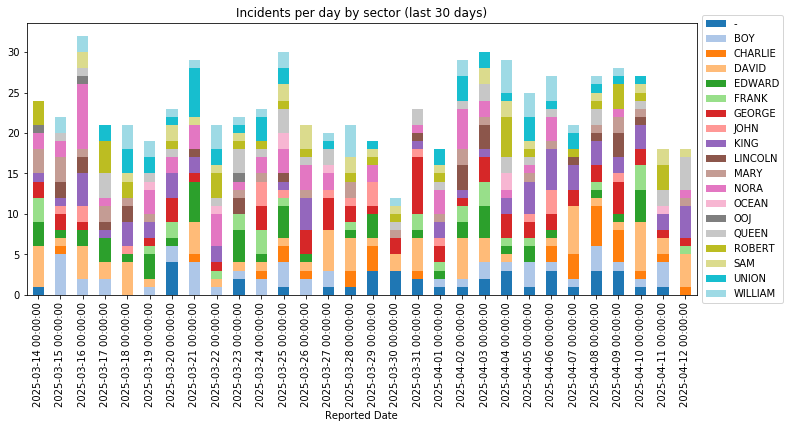

In [93]:
dfp_sector = pd.pivot_table(
    data=df[['Reported Date', 'Sector']],
    index='Reported Date',
    columns=['Sector'],
    aggfunc=len,
)

dfp_sector.iloc[-30::,:].plot.bar(
    stacked=True, 
    figsize=(12,5), 
    colormap='tab20',
    title="Incidents per day by sector (last 30 days)"
).legend(loc='center left', bbox_to_anchor=(1, 0.5))

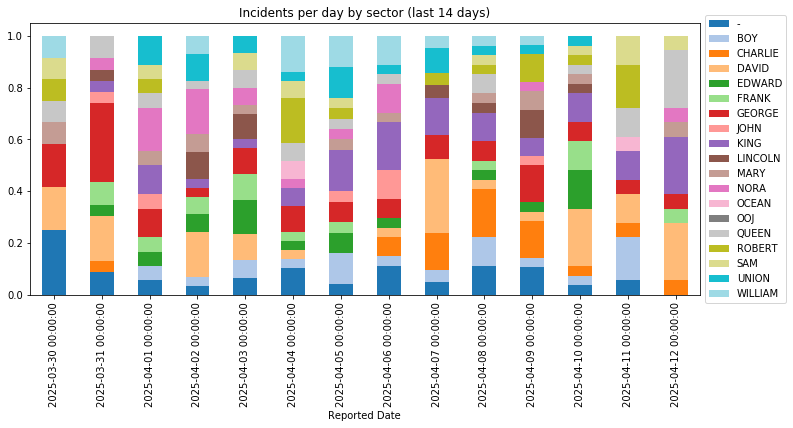

In [94]:
dfp_sector.iloc[-14::,:].div(dfp_sector.iloc[-14::,:].sum(axis=1), axis=0).plot.bar(
    stacked=True, 
    figsize=(12,5), 
    colormap='tab20',
    title="Incidents per day by sector (last 14 days)"
).legend(loc='center left', bbox_to_anchor=(1, 0.5))

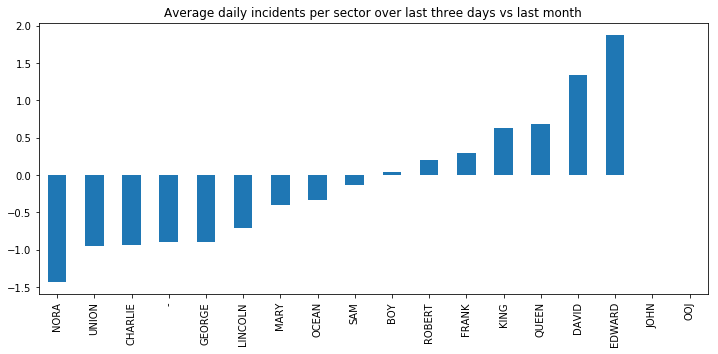

In [95]:
df_trend = pd.DataFrame(index=df['Sector'].sort_values().unique()).iloc[0:-1,:]
df_trend = df_trend.join(
    pd.Series(data=dfp_sector.iloc[-30::,:].T.mean(axis=1), name='last30')
)
df_trend = df_trend.join(
    pd.Series(data=dfp_sector.iloc[-3::,:].T.mean(axis=1), name='last3')
)
df_trend['trend'] = df_trend['last3'] - df_trend['last30'] 
df_trend['trend'].sort_values().plot.bar(title="Average daily incidents per sector over last three days vs last month", figsize=(12,5), colormap='tab20')

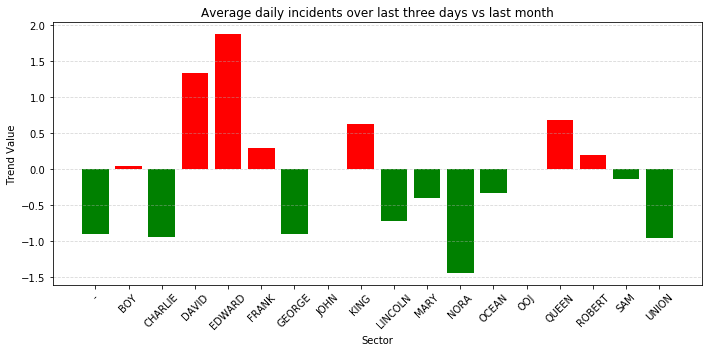

In [96]:
# Setup figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Assign bar colors: red if trend > 0, else green
colors = ['red' if val > 0 else 'green' for val in df_trend['trend']]

# Create the bar plot
ax.bar(
    df_trend.index, 
    df_trend['trend'], 
    color=colors
)

# Titles and labels
ax.set_title("Average daily incidents over last three days vs last month")
ax.set_xlabel("Sector")
ax.set_ylabel("Trend Value")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [97]:
# Delete rows with bad date data
data = data.loc[data['Reported Date'] != '1900-01-01',:]

In [98]:
# Set column types
data['Reported Date'] = pd.to_datetime(data['Reported Date'])
data['Precinct'] = pd.Categorical(data['Precinct'])

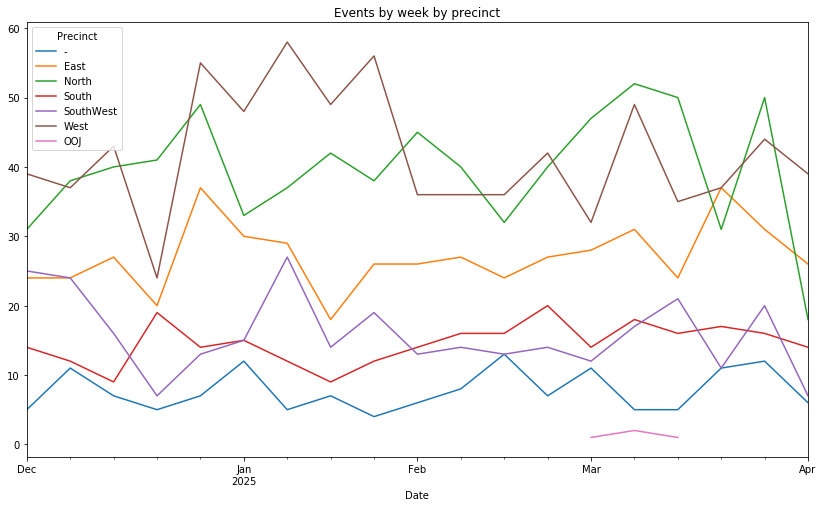

In [99]:
data['Date'] = pd.to_datetime(data['Reported Date']) - pd.to_timedelta(7, unit='d')
fig, ax = plt.subplots(figsize=(14, 8))
data.groupby([pd.Grouper(key='Date', freq='W-MON'), 'Precinct'])['Template ID'].nunique().reset_index(level=1).last("5M").reset_index().pivot(index='Date', columns='Precinct', values= 'Template ID').plot(ax=ax)
plt.title('Events by week by precinct')
plt.show()

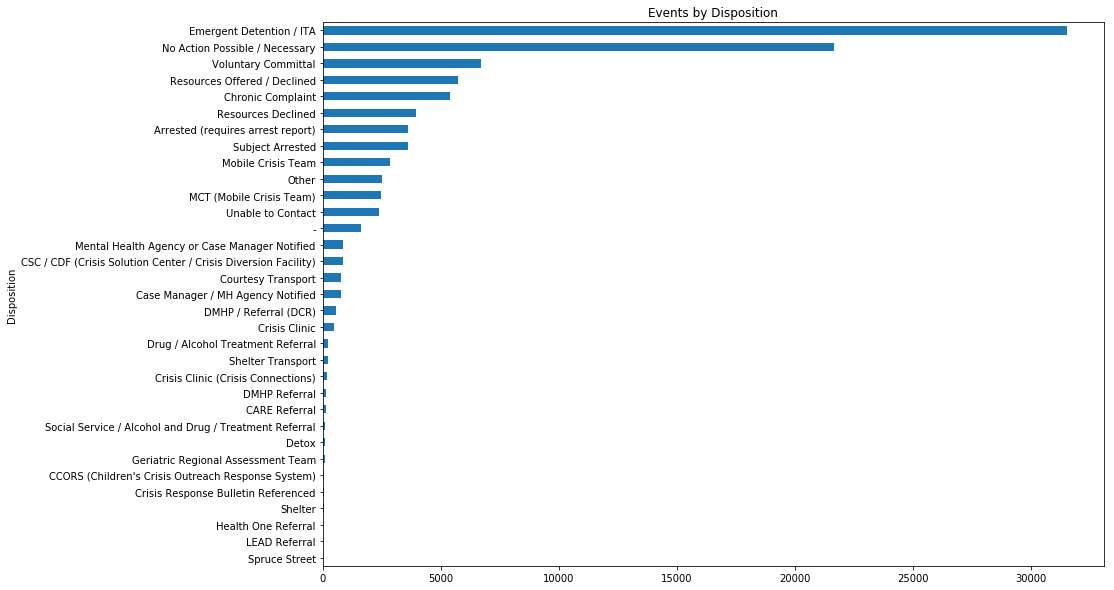

In [100]:
fig, ax = plt.subplots(figsize=(14, 10))
(data[['Template ID', 'Disposition']].groupby(['Disposition'])['Template ID'].nunique().sort_values()).plot.barh(ax=ax)
plt.title('Events by Disposition')
plt.show()

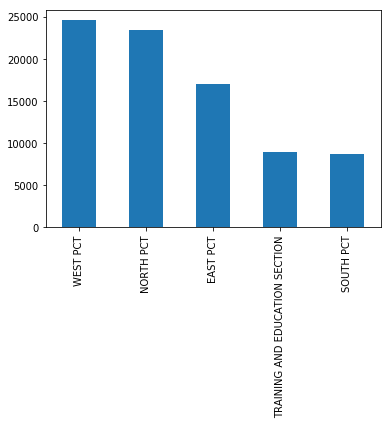

In [101]:


# Creating a dataframe with call count by call type
precinct = data["Officer Precinct Desc"].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

# Creating a dataframe with top 5 call types
top_5_precinct = precinct.head(5)

# Plotting a bar chart for top 5 call types
top_5_precinct.plot(kind = 'bar')

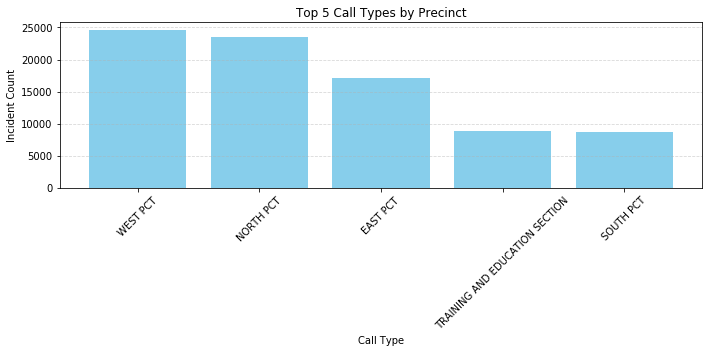

In [102]:
# Prepare the data (already converted to DataFrame)
top5Pre_df = pd.DataFrame({
    'CallType': top_5_precinct.index.tolist(),
    'IncidentCount': top_5_precinct.values
})

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(top5Pre_df['CallType'], top5Pre_df['IncidentCount'], color='skyblue')

# Titles and labels
ax.set_title("Top 5 Call Types by Precinct")
ax.set_xlabel("Call Type")
ax.set_ylabel("Incident Count")

# Style the x-axis
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

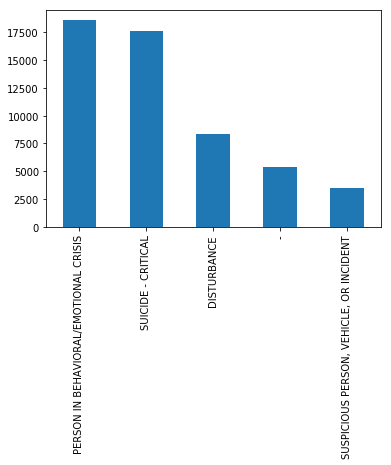

In [103]:
callType = data["Initial Call Type"].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
top_5_callType = callType.head(5)
top_5_callType.plot(kind = "bar")

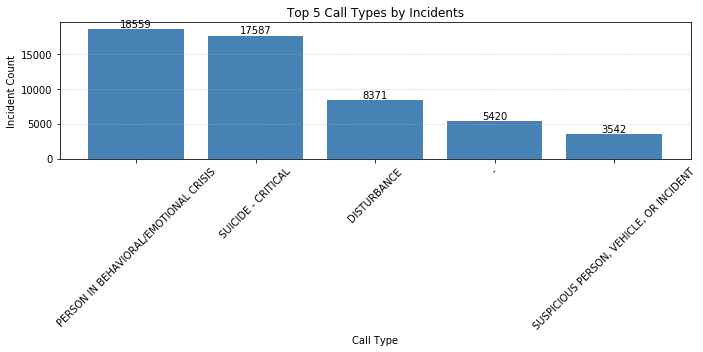

In [104]:

# Convert to DataFrame (already done)
top5_df = pd.DataFrame({
    'CallType': top_5_callType.index.tolist(),
    'IncidentCount': top_5_callType.values
})

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(top5_df['CallType'], top5_df['IncidentCount'], color='steelblue')

# Title and labels
ax.set_title("Top 5 Call Types by Incidents")
ax.set_xlabel("Call Type")
ax.set_ylabel("Incident Count")

# Improve x-axis readability
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Optional: Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [105]:
df_date = df_date[["Lat", "Lon","Disposition"]]
df_date = df_date.dropna()
df_date.head()

,Lat,Lon,Disposition
99458,47.603,-122.327,No Action Possible / Necessary
99459,47.598,-122.323,Other
99460,47.671,-122.291,Emergent Detention / ITA
99461,47.552,-122.289,Other
99462,47.610,-122.329,CSC / CDF (Crisis Solution Center / Crisis Div...


In [106]:
df_date=df_date.reset_index(drop=True)

In [107]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 3 columns):
Lat            95 non-null float64
Lon            95 non-null float64
Disposition    95 non-null object
dtypes: float64(2), object(1)
memory usage: 2.4+ KB


### A map of Seattle pinpointing the most recent locations of the last 100 incidents throughout the city.

In [108]:
import folium

SEA_COORDINATES = (47.6, -122.3)
# for speed purposes
MAX_RECORDS = 90
  
# create empty map zoomed in on San Francisco
map = folium.Map(location=SEA_COORDINATES, zoom_start=12) 

# add a marker for every record in the filtered data, use a clustered view
for each in df_date[0:MAX_RECORDS].iterrows():
    folium.Marker([each[1]["Lat"],
                   each[1]["Lon"]],
                  popup=each[1]["Disposition"]).add_to(map)
    
display(map)